In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append('../')
from package_global_functions import *
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d

# same function as in plot_evos.py
def getTimeEvosPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/evo_to_stationary/time_evos_dif_cond'
    else:
        path = '/time_evos_dif_cond'
    return path

In [2]:
N, pi1, pi2, q1, q2, l = 5000, 0.1, 0.1, 9, 10, 0.8
# get the dataframes with the time evolutions:
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]

In [4]:
df = dfs[0]

In [52]:
def autocorrelation(signal,max_delta=100):
    autocorr = []
    for delta in range(0,max_delta+1):
        autocorr_d = 0
        for i in range(0,len(signal)-1-delta):
            autocorr_d += signal[i]*signal[i+delta]
        autocorr_d = autocorr_d/len(range(0,len(signal)-1-delta))
        autocorr.append(autocorr_d)
    return autocorr

In [47]:
autocorr_signal = autocorrelation(df['f2'][1000:].reset_index(drop=True), max_delta=1000)

[Text(0.5, 0, '$\\tau$'), Text(0, 0.5, '$C_{f_2}(\\tau)$'), None]

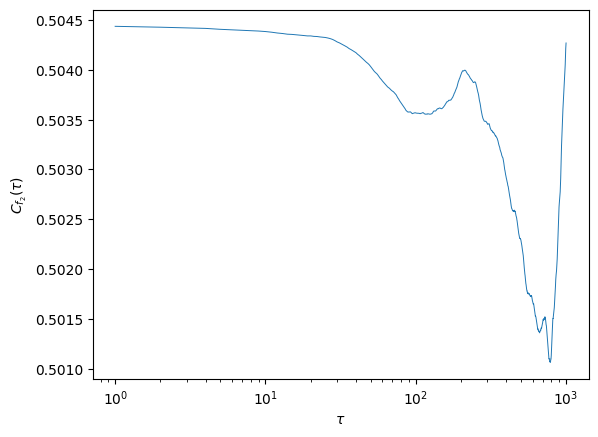

In [48]:
fig, ax = plt.subplots()
ax.plot(list(range(1,len(autocorr_signal)+1)), autocorr_signal, lw=0.7)
ax.set(xlabel=r'$\tau$', ylabel=r'$C_{f_2}(\tau)$', xscale='log')

In [57]:
# autocorrelation function repsective to the distance from the average:
max_delta = 500

autocorr_avg = np.zeros((max_delta+1,))
for df in dfs:
    f2avg = np.average(df['f2'][1000:])
    autocorr = autocorrelation(df['f2'][1000:].reset_index(drop=True)-f2avg, max_delta=max_delta)
    autocorr_avg += autocorr
autocorr_avg /= len(dfs)

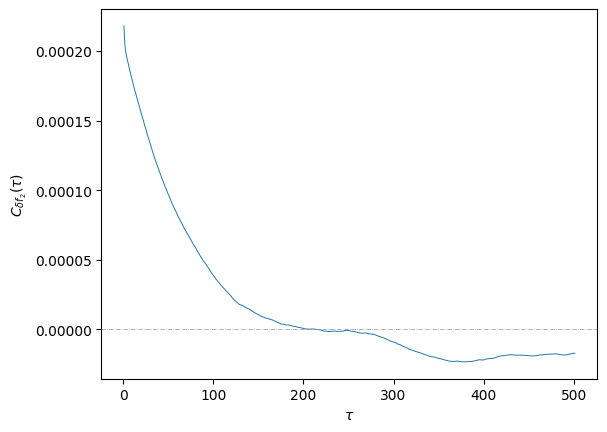

In [66]:
fig, ax = plt.subplots()
ax.plot(list(range(1,len(autocorr)+1)), autocorr_avg, lw=0.7) 
ax.set(xlabel=r'$\tau$', ylabel=r'$C_{\delta f_2}(\tau)$') # , xscale='log'
ax.axhline(0.0, ls='-.', color='xkcd:gray', lw=0.5)

In [67]:
from scipy.integrate import simps

taus = np.arange(0,max_delta+1,1)
int_autocorr_avg = simps(autocorr_avg, taus)
print(int_autocorr_avg)
int_autocorr_avg = simps(autocorr_avg[0:240], taus[0:240])
print(int_autocorr_avg)



0.007708819937046922
0.011744295310047859


In [68]:
delta_f2_avg = 0
for df in dfs:
    f2avg = np.average(df['f2'][1000:])
    delta_f2_traj = np.average((df['f2'] - f2avg)**2)
    delta_f2_avg += delta_f2_traj
delta_f2_avg /= len(dfs)
tau_c = int_autocorr_avg/delta_f2_avg
print(tau_c)

5.3043789984860865
